# Pekiştirmeli/Takviyeli Öğrenme (Reinforced Learning)

**Makinenin Kendi Kendine Öğrenmesidir**

**Kullanımı**
* Robotlar
* Oyunlar (Alpha Go)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
veriler = pd.read_csv("../Docs/Ads_CTR_Optimisation.csv")
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [3]:
for i in range(0,len(veriler.columns)):
    if i == 9:
        toplam = np.sum(veriler[f"Ad {i+1}"])
        print(f"Ad {i+1} için toplam tıklanma: {toplam}")
        continue
    toplam = np.sum(veriler[f"Ad {i+1}"])
    print(f"Ad {i+1}  için toplam tıklanma: {toplam}")

Ad 1  için toplam tıklanma: 1703
Ad 2  için toplam tıklanma: 1295
Ad 3  için toplam tıklanma: 728
Ad 4  için toplam tıklanma: 1196
Ad 5  için toplam tıklanma: 2695
Ad 6  için toplam tıklanma: 126
Ad 7  için toplam tıklanma: 1112
Ad 8  için toplam tıklanma: 2091
Ad 9  için toplam tıklanma: 952
Ad 10 için toplam tıklanma: 489


# Random Distribution

* 10 farklı reklamın 10000 gözlemi
* Her gösterimdeki tıklanma oranı

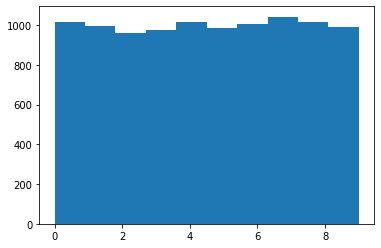

In [4]:
N = 10000
d = 10 
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] # Verilerdeki n. satır = 1 ise ödül 1
    toplam = toplam + odul
    
    
plt.hist(secilenler)
plt.show()

# Üst Güven Sınırı (Upper Confidence Bound - UCB)

**Dağılımlar en avantajlı hale nasıl gelir?**
* Kullanıcı her seferinde bir eylem yapar
* Bu eylem karşılığında bir skor döner (örn. web tıklanması-1 ve tıklanmaması-0)
* Amaç tıklamaları maksimuma çıkarmak

<hr>

* **Adım 1:** Her turda (tur sayısı n olsun), her rakam alternatifi (i için) aşağıdaki sayılar tutulur
    * **Ni(n):** i sayılı reklamın o ana kadar olan tıklama sayısı
    * **Ri(n):** o ana kadar olan i reklamından gelen toplam ödül
* **Adım 2:** Yukarıdaki bu iki sayıdan aşağıdaki değerler hesaplanır
    * O ana kadar olan her raklamın ortalama ödülü: ${\displaystyle {\frac {Ri(n)}{Ni(n)}}}$
    * Güven aralığı için aşağı ve yukarı oynama potansiyeli: ${\displaystyle d_i(n) {\sqrt {{\frac {3}{2}}{\frac {log (n)}{N_i(n)}}}}}$
* **Adım 3:** En yüksek UCB değerine sahip olan alınır

Toplam Ödül:
2231


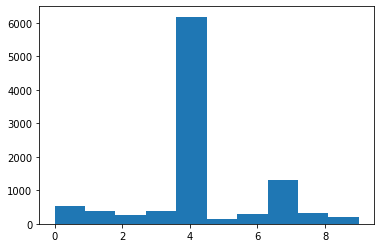

In [36]:
N = 10000 # 10.000 tıklama
d = 10  # Toplam 10 ilan var
#Ri(n)
oduller = [0] * d # İlk basta bütün ilanların ödülü 0
#Ni(n)
tiklamalar = [0] * d # O ana kadar yapılan tıklamalar
toplam = 0 # Toplam ödül
secilenler = []
for n in range(1,N):
    ad = 0 # Seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: # max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise ödül 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Ödül:')   
print(toplam)

plt.hist(secilenler)
plt.show()

# Thompson Örneklemesi

* **Adım 1:** Her aksiyon için aşağıdaki iki sayıyı hesaplama
    * Ni1(n): O ana kadar ödül olarak 1 gelmesi sayısı
    * Ni0(n): O ana kadar ödül olarak 0 elmesi sayısı
* **Adım 2:** Her ilan için aşağıda veirlen Beta dağılımında bir rastgele sayı üretilir
    * ${\displaystyle \theta_i(n) = \beta (N_i^1 (n) + 1, N_i^0(n) + 1)}$
* **Adım 3:** En yüksek beta değerine sahip olan seçilir

Toplam Ödül:
2581


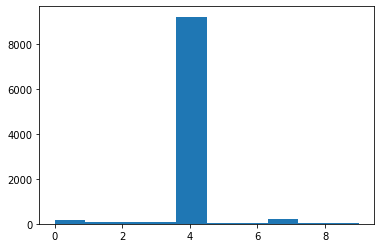

In [5]:
N = 10000 # 10.000 tıklama
d = 10  # Toplam 10 ilan var

#Ni(n)
toplam = 0 # Toplam ödül
secilenler = []
birler = [0] * d
sifirlar = [0] * d
for n in range(1,N):
    ad = 0 # Seçilen ilan
    max_th = 0
    for i in range(0,d):
        rasbeta = random.betavariate ( birler[i] + 1 , sifirlar[i] +1)
        if rasbeta > max_th:
            max_th = rasbeta
            ad = i
    secilenler.append(ad)
    odul = veriler.values[n,ad] # Verilerdeki n. satır = 1 ise ödül 1
    if odul == 1:
        birler[ad] = birler[ad]+1
    else :
        sifirlar[ad] = sifirlar[ad] + 1
    toplam = toplam + odul
print('Toplam Ödül:')   
print(toplam)

plt.hist(secilenler)
plt.show();